In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from swarm_sim import *

%matplotlib inline 

In [16]:
NB_NODES = 50
DURATION = 10000   # Nb samples
REVOLUTION = 1800  # Nb samples
SAMPLE_FREQ = 0.1  # Hz, 1 sample every 10 seconds
CONNECTION_RANGE = 30000 # m

# Variables globales pour l'analyse
SAMPLE_STEP = 12
NB_REPETITIONS = 30

# Variables globales figures
TMAX = REVOLUTION/SAMPLE_FREQ
IDX = np.arange(0, TMAX, (1/SAMPLE_FREQ)*SAMPLE_STEP) # conversion en secondes

In [36]:
import matplotlib.ticker as ticker

def box_plot(datasets, index, fill_color, hatch_pattern=None):
    x_pos_range = np.arange(len(datasets)) / (len(datasets) - 1)
    x_pos = (x_pos_range * 0.5) + 0.75
    bp = ax.boxplot(
        np.array(datasets[index]), sym='', whis=[0, 100], widths=0.6 / len(datasets),
        labels=list(datasets[0]),
        positions=[x_pos[index] + j * 1 for j in range(len(datasets[index].T))],
        patch_artist=True
    )
    for median in bp['medians']:
        median.set_color('black')
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)
        if hatch_pattern: 
            patch.set(hatch=hatch_pattern)    
    return bp

In [2]:
df_original = pd.read_csv('..\output\data\sat50_reliability_undivided_sampled12.csv' , sep=',', index_col='Unnamed: 0')
original = df_original.set_index('Timestamp')
original

,RFlow,RCost,Efficiency,Redundancy,Disparity,Criticity
Timestamp,,,,,,
0,1.0,8734,0.459133,3.888163,0.288980,12
12,1.0,8824,0.458643,3.877551,0.292381,13
24,1.0,8672,0.456952,4.216327,0.296465,14
36,1.0,8616,0.470500,3.360816,0.248742,11
48,1.0,9024,0.410649,4.475102,0.333679,18
...,...,...,...,...,...,...
1740,1.0,9200,0.421857,4.953469,0.339085,19
1752,1.0,8806,0.425260,4.457143,0.327870,17
1764,1.0,8720,0.440979,4.564898,0.292327,12


In [39]:
df_rnd = pd.read_csv('..\output\data\sat50_reliability_RND_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')
df_mirw = pd.read_csv('..\output\data\sat50_reliability_MIRW_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')
df_ffd = pd.read_csv('..\output\data\sat50_reliability_FFD_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')
#df_kmeans = pd.read_csv('..\output\data\sat50_RCOST_KMeans_sampled12_rep30.csv', sep=',', index_col='Unnamed: 0')

df_rnd = df_rnd.groupby('Timestamp').mean()
df_mirw = df_mirw.groupby('Timestamp').mean()
df_ffd = df_ffd.groupby('Timestamp').mean()
#df_kmeans = df_kmeans.groupby('Nb groups').mean()

df_mirw.head()

,RFlow,RCost,Efficiency,Redundancy,Disparity,Criticity
Timestamp,,,,,,
0,1.0,488.066667,0.680914,2.387000,0.172014,10.666667
12,1.0,495.933333,0.672692,2.381000,0.188855,11.233333
24,1.0,502.066667,0.660544,2.557667,0.207662,11.500000
36,1.0,500.866667,0.660327,2.163000,0.183786,11.066667
48,1.0,546.733333,0.585529,2.891000,0.228267,11.833333


In [5]:
ref_rcost_avg = original['RCost'].mean()
print('Coût de routage moyen dans le graphe original:', int(ref_rcost_avg), 'transmissions')

Coût de routage moyen dans le graphe original: 8171 transmissions


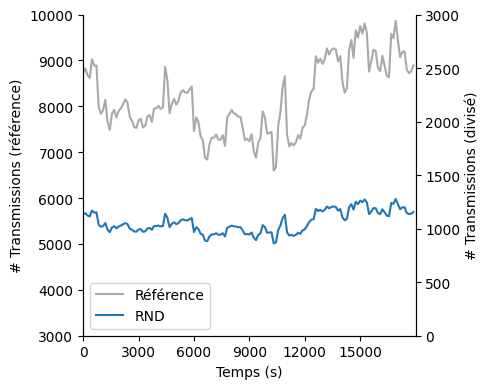

In [24]:
fig, ax = plt.subplots(figsize=(5,4))
metric = 'RCost'

l1 = ax.plot(IDX, original[metric], label='Référence', c='darkgray')
ax.set_xlabel('Temps (s)')
ax.set_ylabel('# Transmissions (référence)', color='black')
ax.tick_params(axis='y', labelcolor='black')
ax.set_xlim(0,TMAX)
ax.set_ylim(3000, 10000)
ax.spines['top'].set_visible(False)
ax.set_xticks(np.arange(0, TMAX, 3000))

ax2 = ax.twinx()
#ax2.plot(idx, mirw[metric], label='MIRW')
l2 = ax2.plot(IDX, df_rnd[metric], label='RND')
#ax2.plot(idx, ffd[metric], label='FFD')
ax2.set_ylabel('# Transmissions (divisé)', color='black')
ax2.set_ylim(0, 3000)
ax2.tick_params(axis='y', labelcolor='black')
ax2.spines['top'].set_visible(False)

lns = l1 + l2
labels = [l.get_label() for l in lns]
ax.legend(lns, labels)
fig.tight_layout()

(0.0, 18000.0)

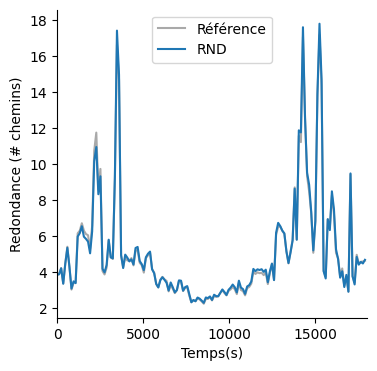

In [35]:
fig,ax = plt.subplots(figsize=(4,4))
metric = 'Redundancy'

ax.plot(IDX, original[metric], label='Référence', c='darkgray')
#ax.plot(IDX, mirw[metric], label='MIRW')
ax.plot(IDX, df_rnd[metric], label='RND')
#ax.plot(IDX, ffd[metric], label='FFD')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_xlabel('Temps(s)')
ax.set_ylabel('Redondance (# chemins)')
ax.set_xlim(0,TMAX)
#ax.set_ylim(0, 1)

In [34]:
original.corr()

,RFlow,RCost,Efficiency,Redundancy,Disparity,Criticity
RFlow,1.000000,0.297881,-0.143140,0.191958,0.159216,0.291608
RCost,0.297881,1.000000,-0.845505,0.391587,-0.160366,0.628136
Efficiency,-0.143140,-0.845505,1.000000,-0.309247,-0.060434,-0.750182
Redundancy,0.191958,0.391587,-0.309247,1.000000,0.382575,0.289843
Disparity,0.159216,-0.160366,-0.060434,0.382575,1.000000,0.157585
Criticity,0.291608,0.628136,-0.750182,0.289843,0.157585,1.000000


In [33]:
df_rnd.corr()

,RFlow,RCost,Efficiency,Redundancy,Disparity,Criticity
RFlow,1.000000,0.287728,-0.150553,0.189443,0.189791,0.163870
RCost,0.287728,1.000000,-0.857474,0.375252,-0.177076,0.634683
Efficiency,-0.150553,-0.857474,1.000000,-0.290135,-0.008084,-0.548682
Redundancy,0.189443,0.375252,-0.290135,1.000000,0.387723,0.310361
Disparity,0.189791,-0.177076,-0.008084,0.387723,1.000000,-0.058079
Criticity,0.163870,0.634683,-0.548682,0.310361,-0.058079,1.000000
